# Check outputs

inputFiles/SnowMIP/oas/job_options_file_spinup_Paul_CTEM_off.txt

- 1998 to 2009 
- metLoop = 20
- spinfast = 1

Annual outputs only

In [1]:
site = 'oas'
site_longname = 'BERMS Old Aspen, Saskatchewan, Canada'
y_start = 1998
y_end = 2009
metLoop = 20
spinfast = 5

print('Spinup years: ' + str((y_end-y_start+1)*metLoop) + '\nWith spinfast equivals to: ' + str((y_end-y_start+1)*metLoop*spinfast)) 

Spinup years: 240
With spinfast equivals to: 1200


In [2]:
# Env: sc2_v0
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import calendar
import os

In [3]:
exp = 'Paul_CTEM_off'
path = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/'+site+'/spinup_'+exp

In [4]:
!ls {path}

actlyr_annually.nc     ftablemin_annually.nc  pr_annually.nc
actlyrmax_annually.nc  hfls_annually.nc       rls_annually.nc
actlyrmin_annually.nc  hfss_annually.nc       rss_annually.nc
albs_annually.nc       mrro_annually.nc       sftlf.nc
evspsbl_annually.nc    mrsfl_annually.nc      tas_annually.nc
ftable_annually.nc     mrsll_annually.nc      tran_annually.nc
ftablemax_annually.nc  output.txt


As we generally start the C pools, etc. from zero it takes several runs to spin up sites. Especially the high-latitude sites tend to be slower to spin up. To check whether the model is spun up, we usually look at the outputs for NBP, soil C, etc. to see whether they’re relatively stable or close to zero for NBP averaged over several years. An easy check is to look at the ratio of NEP/NPP. We usually say that a site is spun up, if the absolute value of NEP/NPP is less than 0.02.

In [6]:
site = 'oas'
site_longname = 'BERMS Old Aspen, Saskatchewan, Canada'
y_start = 1998
y_end = 2009

ds_yr = xr.open_mfdataset(path+'/*_annually.nc').squeeze().load()
ds_yr

<xarray.Dataset>
Dimensions:    (time: 12, layer: 20)
Coordinates:
  * time       (time) datetime64[ns] 1998-12-31 1999-12-31 ... 2009-12-31
  * layer      (layer) int16 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
Data variables: (12/20)
    longitude  float64 -106.2
    latitude   float64 53.63
    actlyr     (time) float64 61.3 61.25 61.29 61.29 ... 61.31 61.33 61.31 61.13
    actlyrmax  (time) float64 61.4 61.4 61.4 61.4 61.4 ... 61.4 61.4 61.4 61.4
    actlyrmin  (time) float64 60.85 60.75 60.87 60.89 ... 61.06 60.89 60.46
    albs       (time) float64 0.1734 0.178 0.1749 ... 0.1806 0.1767 0.1753
    ...         ...
    mrsll      (time, layer) float64 17.33 16.28 16.64 ... 1.907e+03 0.0
    pr         (time) float64 1.796e-05 1.54e-05 ... 1.266e-05 1.431e-05
    rls        (time) float64 -53.61 -51.14 -52.05 ... -49.83 -53.96 -53.52
    rss        (time) float64 116.6 108.5 109.8 119.8 ... 113.6 119.3 115.7
    tas        (time) float64 276.5 276.1 274.4 276.1 ... 274.7 274.1 274.1
    tran       (time) float64 1.271e-05 1.13e-05 ... 1.161e-05 1.034e-05
Attributes:
    title:        CLASSIC output file
    timestamp:    20240126 0945
    Conventions:  COARDS
    node_offset:  1
    Comment:       spinup Paul_CTEM_off

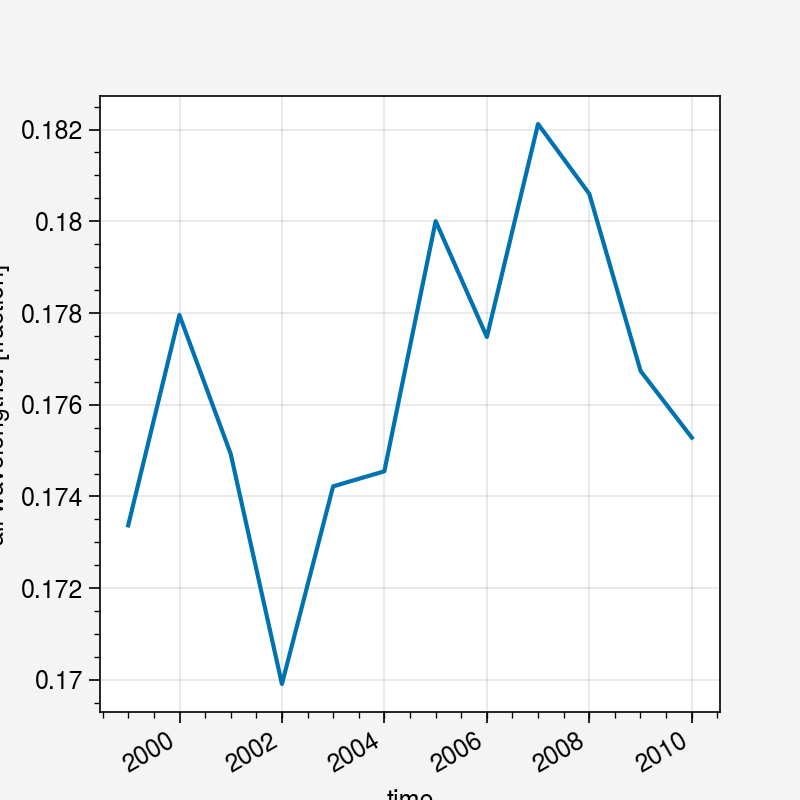

In [7]:
ds_yr.albs.plot()

In [11]:
path_in = '/home/lalandmi/eccc/classic-develop/inputFiles/SnowMIP/oas/'
rsfile = xr.open_dataset(path_in+'/rsfile_spinup_'+exp+'.nc').load()
rsfile

<xarray.Dataset>
Dimensions:            (tile: 1, lat: 1, lon: 1, icp1: 6, layer: 20, ic: 5,
                        icc: 12, iccp1: 13, iccp2: 14, slope: 8)
Coordinates:
  * ic                 (ic) int32 1 2 3 4 5
  * icc                (icc) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * iccp1              (iccp1) int32 1 2 3 4 5 6 7 8 9 10 11 12 13
  * iccp2              (iccp2) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * icp1               (icp1) int32 1 2 3 4 5 6
  * lat                (lat) float64 53.63
  * layer              (layer) int32 1 2 3 4 5 6 7 8 ... 13 14 15 16 17 18 19 20
  * lon                (lon) float64 -106.2
  * slope              (slope) int32 1 2 3 4 5 6 7 8
  * tile               (tile) int32 1
Data variables: (12/101)
    ALBS               (tile, lat, lon) float64 0.84
    ALIC               (tile, icp1, lat, lon) float64 0.0 0.29 0.0 0.0 0.0 0.0
    ALVC               (tile, icp1, lat, lon) float64 0.0 0.05 0.0 0.0 0.0 0.0
    CLAY               (tile, layer, lat, lon) float64 0.0 24.2 ... 22.1 0.0
    CMAS               (tile, ic, lat, lon) float64 0.0 20.0 0.0 0.0 0.0
    Cmossmas           (tile, lat, lon) float64 0.0
    ...                 ...
    stemmass_s         (tile, icc, lat, lon) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    stmhrlos           (tile, icc, lat, lon) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    tcoldm             (lat, lon) float32 99.0
    twarmm             (lat, lon) float32 -99.0
    tymaxlai           (tile, icc, lat, lon) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    nh4_mass           (tile, iccp1, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0
Attributes:
    title:          CLASSIC initialization file created from: /home/acrp001/m...
    creation_date:  20190523
    history:        Wed Jun 12 17:19:01 2019: ncks -4 ./rsfile.nc ./rsfile.nc
    NCO:            4.4.2
    row_bounds:     1 1

In [18]:
rsfile

<xarray.Dataset>
Dimensions:            (tile: 1, lat: 1, lon: 1, icp1: 6, layer: 20, ic: 5,
                        icc: 12, iccp1: 13, iccp2: 14, slope: 8)
Coordinates:
  * ic                 (ic) int32 1 2 3 4 5
  * icc                (icc) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * iccp1              (iccp1) int32 1 2 3 4 5 6 7 8 9 10 11 12 13
  * iccp2              (iccp2) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * icp1               (icp1) int32 1 2 3 4 5 6
  * lat                (lat) float64 53.63
  * layer              (layer) int32 1 2 3 4 5 6 7 8 ... 13 14 15 16 17 18 19 20
  * lon                (lon) float64 -106.2
  * slope              (slope) int32 1 2 3 4 5 6 7 8
  * tile               (tile) int32 1
Data variables: (12/101)
    ALBS               (tile, lat, lon) float64 0.84
    ALIC               (tile, icp1, lat, lon) float64 0.0 0.29 0.0 0.0 0.0 0.0
    ALVC               (tile, icp1, lat, lon) float64 0.0 0.05 0.0 0.0 0.0 0.0
    CLAY               (tile, layer, lat, lon) float64 0.0 24.2 ... 22.1 0.0
    CMAS               (tile, ic, lat, lon) float64 0.0 20.0 0.0 0.0 0.0
    Cmossmas           (tile, lat, lon) float64 0.0
    ...                 ...
    stemmass_s         (tile, icc, lat, lon) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    stmhrlos           (tile, icc, lat, lon) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    tcoldm             (lat, lon) float32 99.0
    twarmm             (lat, lon) float32 -99.0
    tymaxlai           (tile, icc, lat, lon) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    nh4_mass           (tile, iccp1, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0
Attributes:
    title:          CLASSIC initialization file created from: /home/acrp001/m...
    creation_date:  20190523
    history:        Wed Jun 12 17:19:01 2019: ncks -4 ./rsfile.nc ./rsfile.nc
    NCO:            4.4.2
    row_bounds:     1 1

In [33]:
a.to_netcdf('/home/lalandmi/eccc/classic-develop/inputFiles/SnowMIP/oas/rsfile_run_Paul_CTEM_off_test.nc')

In [22]:
a = xr.open_dataset('/home/lalandmi/eccc/classic-develop/inputFiles/SnowMIP/oas/oas_init_run_Paul_CTEM_off_test.nc')
a

<xarray.Dataset>
Dimensions:            (tile: 1, lat: 1, lon: 1, icp1: 6, layer: 20, ic: 5,
                        icc: 12, iccp1: 13, iccp2: 14, slope: 8)
Coordinates:
  * ic                 (ic) int32 1 2 3 4 5
  * icc                (icc) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * iccp1              (iccp1) int32 1 2 3 4 5 6 7 8 9 10 11 12 13
  * iccp2              (iccp2) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * icp1               (icp1) int32 1 2 3 4 5 6
  * lat                (lat) float64 53.63
  * layer              (layer) int32 1 2 3 4 5 6 7 8 ... 13 14 15 16 17 18 19 20
  * lon                (lon) float64 -106.2
  * slope              (slope) int32 1 2 3 4 5 6 7 8
  * tile               (tile) int32 1
Data variables: (12/101)
    ALBS               (tile, lat, lon) float64 ...
    ALIC               (tile, icp1, lat, lon) float64 ...
    ALVC               (tile, icp1, lat, lon) float64 ...
    CLAY               (tile, layer, lat, lon) float64 ...
    CMAS               (tile, ic, lat, lon) float64 ...
    Cmossmas           (tile, lat, lon) float64 ...
    ...                 ...
    stemmass_s         (tile, icc, lat, lon) float64 ...
    stmhrlos           (tile, icc, lat, lon) float64 ...
    tcoldm             (lat, lon) float32 ...
    twarmm             (lat, lon) float32 ...
    tymaxlai           (tile, icc, lat, lon) float64 ...
    nh4_mass           (tile, iccp1, lat, lon) float32 ...
Attributes:
    title:          CLASSIC initialization file created from: /home/acrp001/m...
    creation_date:  20190523
    history:        Wed Jun 12 17:19:01 2019: ncks -4 ./rsfile.nc ./rsfile.nc
    NCO:            4.4.2
    row_bounds:     1 1

In [30]:
a.SCAN[0, 0, 0] = 0

In [32]:
a.SCAN

<xarray.DataArray 'SCAN' (tile: 1, lat: 1, lon: 1)>
array([[[0.]]])
Coordinates:
  * lat      (lat) float64 53.63
  * lon      (lon) float64 -106.2
  * tile     (tile) int32 1
Attributes:
    units:      kg/m2
    long_name:  Intercepted frozen water stored on canopy

In [20]:
path_in = '/home/lalandmi/eccc/classic-develop/inputFiles/SnowMIP/oas/'
!cp {path_in}/rsfile_spinup_{exp}.nc {path_in}/oas_init_run_{exp}.nc
!cp {path_in}/rsfile_spinup_{exp}.nc {path_in}/rsfile_run_{exp}.nc
!mkdir /home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/{site}/run_{exp}

mkdir: impossible de créer le répertoire « /home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/oas/run_Paul_CTEM_off »: Le fichier existe
